In [1]:
import torch
import torch.nn as nn
from torchvision.models import alexnet
from torchvision import datasets, transforms

In [2]:
torch.__version__

'2.1.0.dev20230729'

In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [4]:
data_transform = transforms.Compose([
    transforms.Resize(size=(227,227)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [5]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=data_transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=data_transform
)

100%|███████████████████████████| 26421880/26421880 [00:56<00:00, 470517.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 173670.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████| 4422102/4422102 [00:10<00:00, 438350.88it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 4337540.58it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
out_classes = training_data.classes
out_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

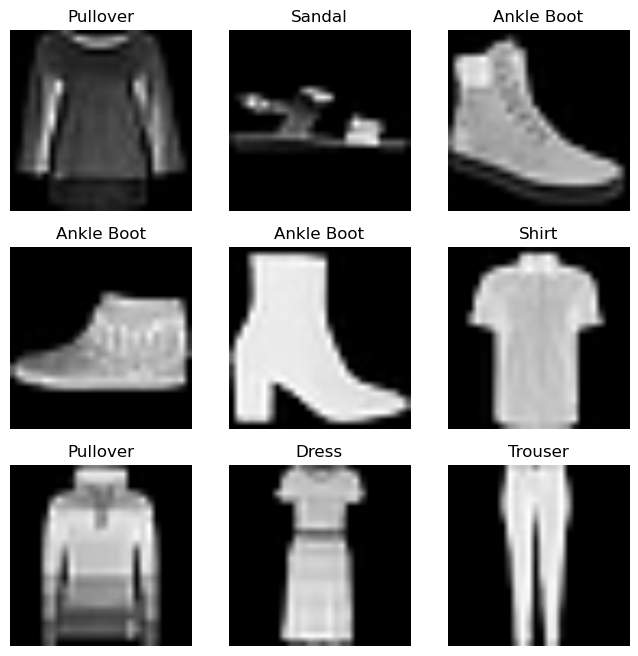

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = training_data,
                    batch_size = 32,
                    shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                    batch_size = 32,
                    shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12fc78990>,
 <torch.utils.data.dataloader.DataLoader at 0x13f5d6d90>)

In [9]:
model = alexnet()
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
model.features[0] = nn.Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
model.classifier[6] = nn.Linear(4096,len(out_classes))

In [11]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
def train_step(model: torch.nn.Module,
         data: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module, 
         optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X,y) in enumerate(data):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(data)
    train_acc = train_acc / len(data)
    return train_loss, train_acc

In [13]:
def test_step(model: torch.nn.Module, 
              data: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):

    model.eval() 
    

    test_loss, test_acc = 0, 0
    
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data):
            
            X, y = X.to(device), y.to(device)
                
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
            test_pred_class = test_pred.argmax(dim=1)
            test_acc += ((test_pred_class == y).sum().item()/len(test_pred_class))
            
    test_loss = test_loss / len(data)
    test_acc = test_acc / len(data)
    return test_loss, test_acc

In [14]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_data: torch.utils.data.DataLoader, 
          test_data: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                            data=train_data,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                data=test_data,
                loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
                )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [15]:
torch.manual_seed(21) 

model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.005)

from timeit import default_timer as timer 
start_time = timer()

model_results = train(model=model, 
                        train_data=train_dataloader,
                        test_data=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=3)
                       

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.6149 | train_acc: 0.6387 | test_loss: 0.6408 | test_acc: 0.7469
Epoch: 2 | train_loss: 0.7553 | train_acc: 0.7155 | test_loss: 0.6631 | test_acc: 0.7352
Epoch: 3 | train_loss: 0.7325 | train_acc: 0.7269 | test_loss: 0.6176 | test_acc: 0.7724
Total training time: 313.060 seconds


In [16]:
from torchinfo import summary

In [17]:
summary(model, input_size = [1,1,227,227])

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 56, 56]           7,808
│    └─ReLU: 2-2                         [1, 64, 56, 56]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]          

In [18]:
import torch.nn.utils.prune as prune

In [19]:
parameters = (
    (model.features[0], "weight"),
    (model.features[3], "weight"),
    (model.features[6], "weight"),
    (model.features[8], "weight"),
    (model.features[10], "weight"),
    (model.classifier[1], "weight"),
    (model.classifier[4], "weight"),
    (model.classifier[6], "weight"),
)
prune.global_unstructured(
    parameters,
    pruning_method=prune.L1Unstructured,
    amount=0.4,
)

In [20]:
summary(model, input_size = [1,1,227,227])

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 56, 56]           5,922
│    └─ReLU: 2-2                         [1, 64, 56, 56]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          175,391
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          390,144
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          529,781
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]          

In [22]:
torch.manual_seed(21) 

model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.005)

from timeit import default_timer as timer 
start_time = timer()

model_results = train(model=model, 
                        train_data=train_dataloader,
                        test_data=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=3)
                       

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7328 | train_acc: 0.7291 | test_loss: 0.6222 | test_acc: 0.7683
Epoch: 2 | train_loss: 0.7365 | train_acc: 0.7263 | test_loss: 0.6134 | test_acc: 0.7712
Epoch: 3 | train_loss: 0.7210 | train_acc: 0.7323 | test_loss: 0.5949 | test_acc: 0.7752
Total training time: 348.815 seconds
